<a href="https://colab.research.google.com/github/Vkrisn/MLE/blob/main/V_Second_Program_Nirmala_Classification_Assignment_0308_JPMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [3]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)


 Numpy: 1.22.4

 sklearn: 1.2.1


In [4]:
## Load data
df = pd.read_csv("./Hotel Reservations.csv")
%time
df.head(5)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
%timeit
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)
 

Rows and Columns: 
 (36275, 19) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
# How many unique values per feature
df.nunique().to_frame()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


In [8]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


In [9]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

(36275, 19)


In [10]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


booking_id                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

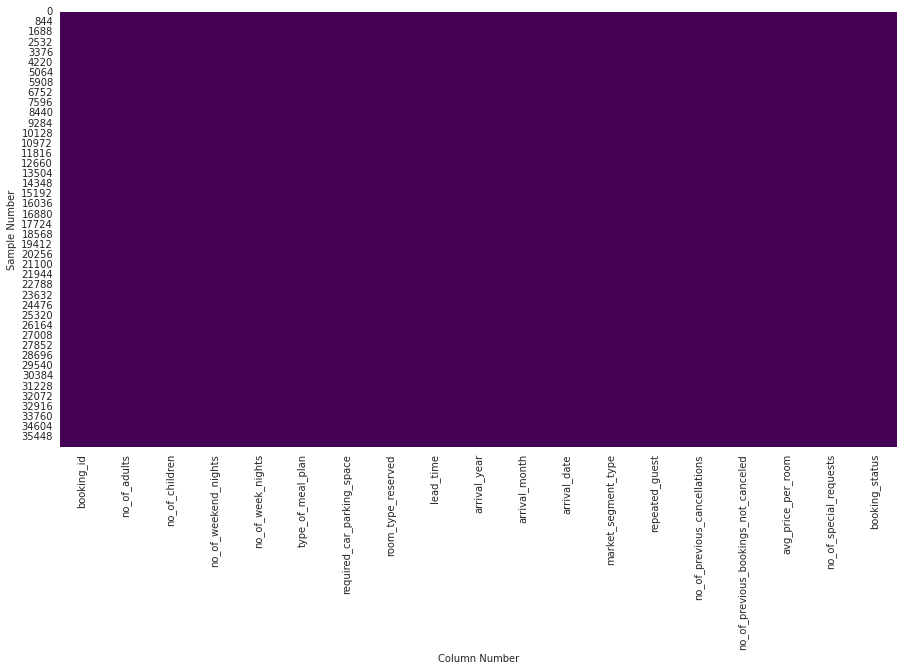

In [11]:
# MISSING VALUES
df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])  

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [12]:
## Need to find the target column, lets try to find the class of target 
df["booking_status"].value_counts()

not_canceled    24390
canceled        11885
Name: booking_status, dtype: int64

In [13]:
# Checking for Null Values 
df.isnull().sum()

booking_id                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
# drop any col that is more than 15% empty
df = df.dropna(thresh=df.shape[0] * 0.85,axis=1)
df.shape

(36275, 19)

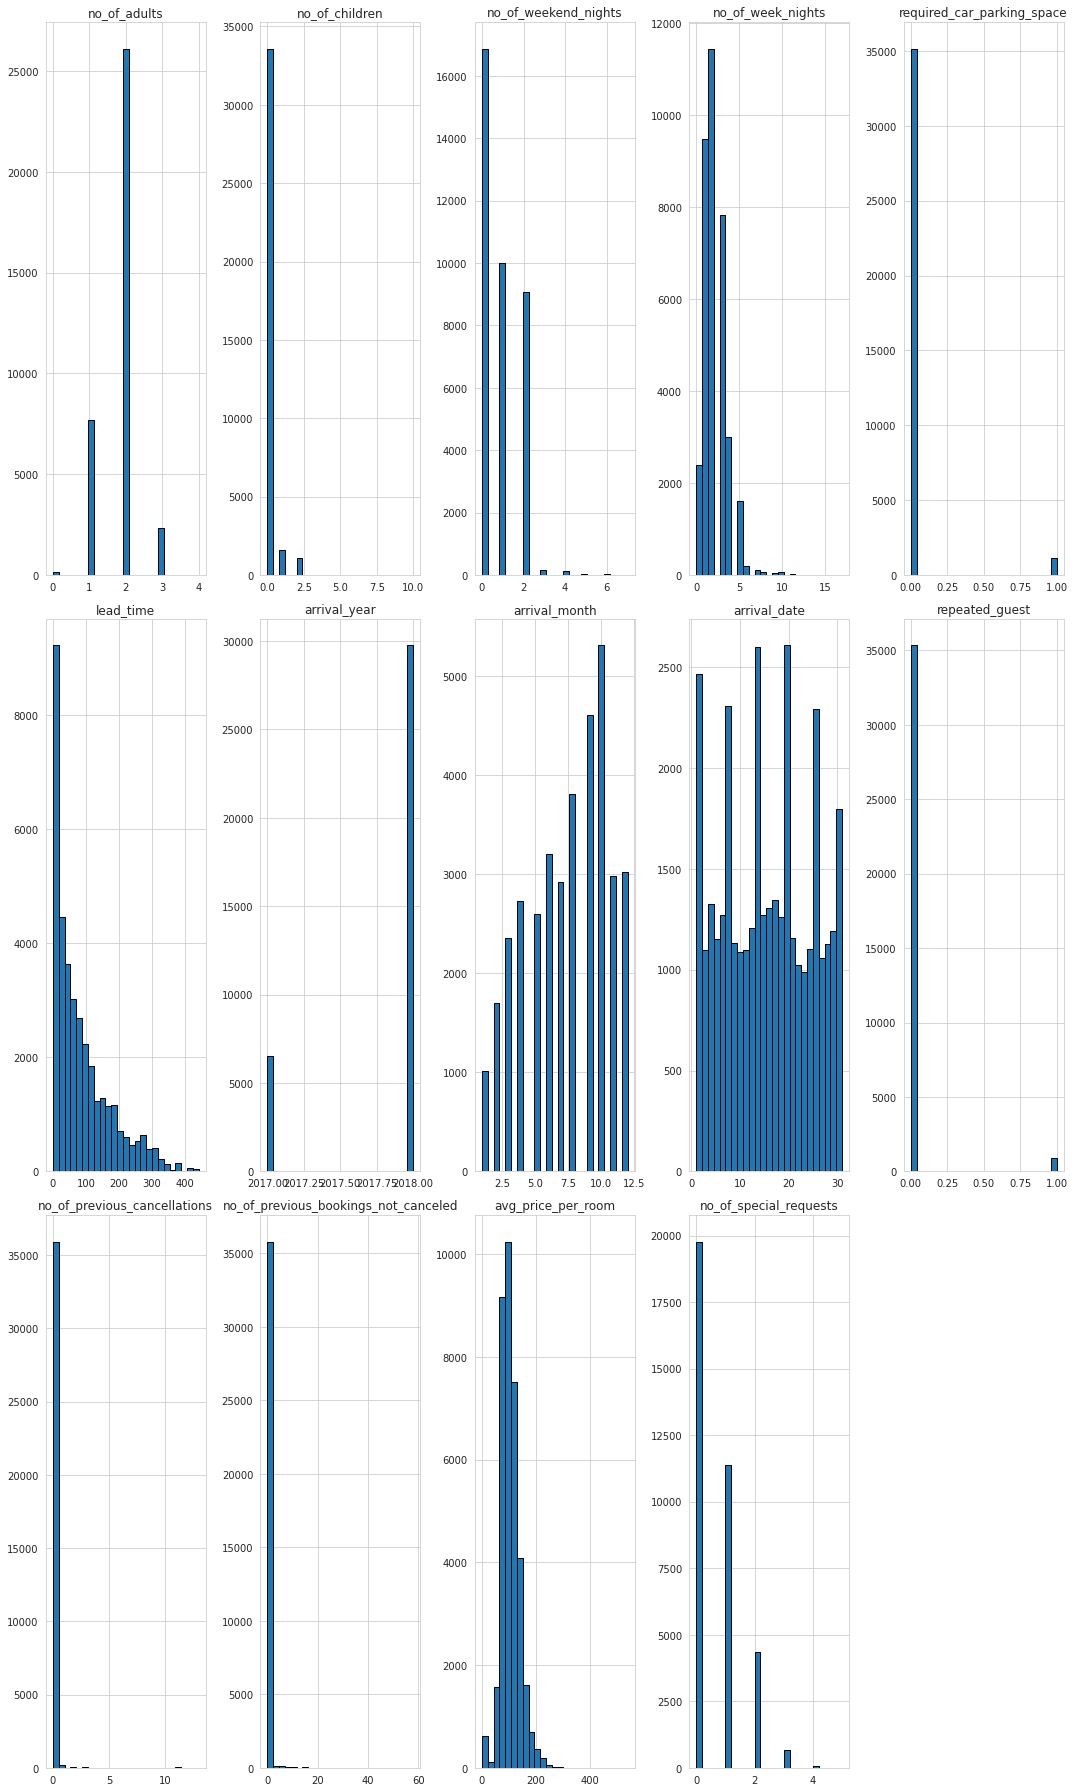

In [15]:
#  Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

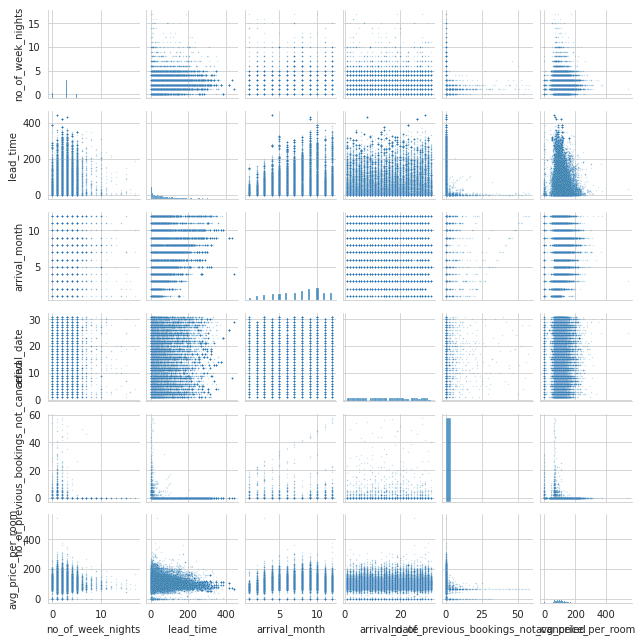

In [16]:
# b) Patterns
# Creates mask to identify numerical features with more or less than 10 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 10

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


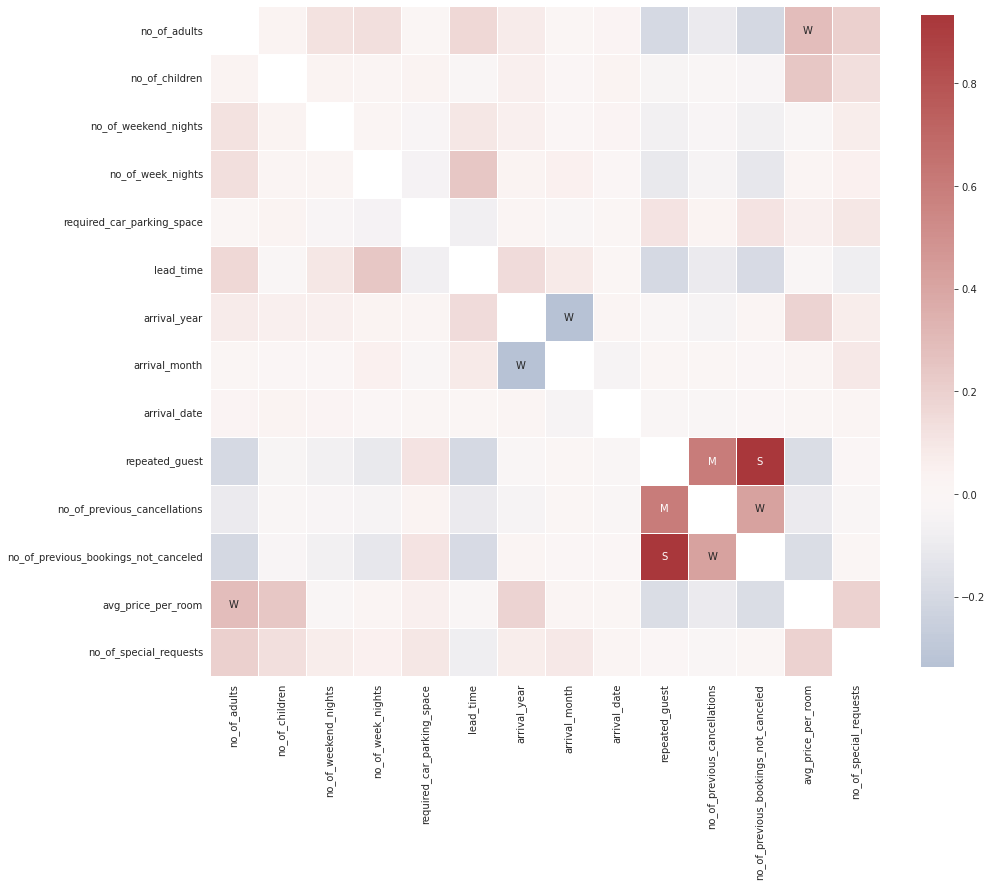

In [17]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [18]:
df.dtypes


booking_id                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [19]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('booking_id ' + str(sorted(df['booking_id'].unique())))
# meal_plan
print('type_of_meal_plan  ' + str(sorted(df['type_of_meal_plan'].unique())))

booking_id ['inn00001', 'inn00002', 'inn00003', 'inn00004', 'inn00005', 'inn00006', 'inn00007', 'inn00008', 'inn00009', 'inn00010', 'inn00011', 'inn00012', 'inn00013', 'inn00014', 'inn00015', 'inn00016', 'inn00017', 'inn00018', 'inn00019', 'inn00020', 'inn00021', 'inn00022', 'inn00023', 'inn00024', 'inn00025', 'inn00026', 'inn00027', 'inn00028', 'inn00029', 'inn00030', 'inn00031', 'inn00032', 'inn00033', 'inn00034', 'inn00035', 'inn00036', 'inn00037', 'inn00038', 'inn00039', 'inn00040', 'inn00041', 'inn00042', 'inn00043', 'inn00044', 'inn00045', 'inn00046', 'inn00047', 'inn00048', 'inn00049', 'inn00050', 'inn00051', 'inn00052', 'inn00053', 'inn00054', 'inn00055', 'inn00056', 'inn00057', 'inn00058', 'inn00059', 'inn00060', 'inn00061', 'inn00062', 'inn00063', 'inn00064', 'inn00065', 'inn00066', 'inn00067', 'inn00068', 'inn00069', 'inn00070', 'inn00071', 'inn00072', 'inn00073', 'inn00074', 'inn00075', 'inn00076', 'inn00077', 'inn00078', 'inn00079', 'inn00080', 'inn00081', 'inn00082', 'inn

In [20]:
# room_type_reserved 
print('room_type_reserved  ' + str(sorted(df['room_type_reserved'].unique())))

room_type_reserved  ['room_type_1', 'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5', 'room_type_6', 'room_type_7']


In [21]:
#market_segment_type
print('market_segment_type  ' + str(sorted(df['market_segment_type'].unique())))

market_segment_type  ['aviation', 'complementary', 'corporate', 'offline', 'online']


<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

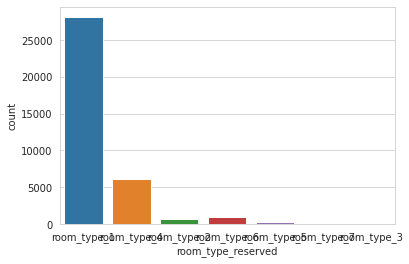

In [22]:
# Univariate Analysis - Analyze 1 variable at a time
# This analysis is restricted to cat cols ... 

sns.countplot(x="room_type_reserved", data=df)

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

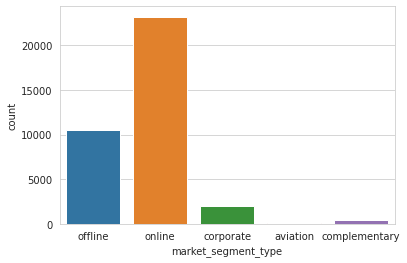

In [23]:
# Univariate Analysis - Analyze 1 variable at a time
# This analysis is restricted to cat cols ... 

sns.countplot(x="market_segment_type", data=df)

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

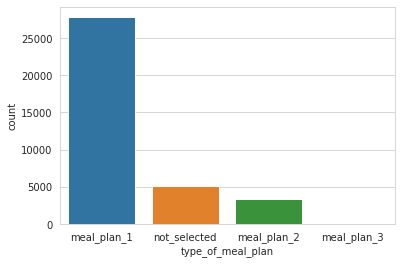

In [24]:
# Univariate Analysis - Analyze 1 variable at a time
# This analysis is restricted to cat cols ... 

sns.countplot(x="type_of_meal_plan", data=df)

In [25]:
df['booking_status'].value_counts()

not_canceled    24390
canceled        11885
Name: booking_status, dtype: int64

In [26]:
# Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

<AxesSubplot:>

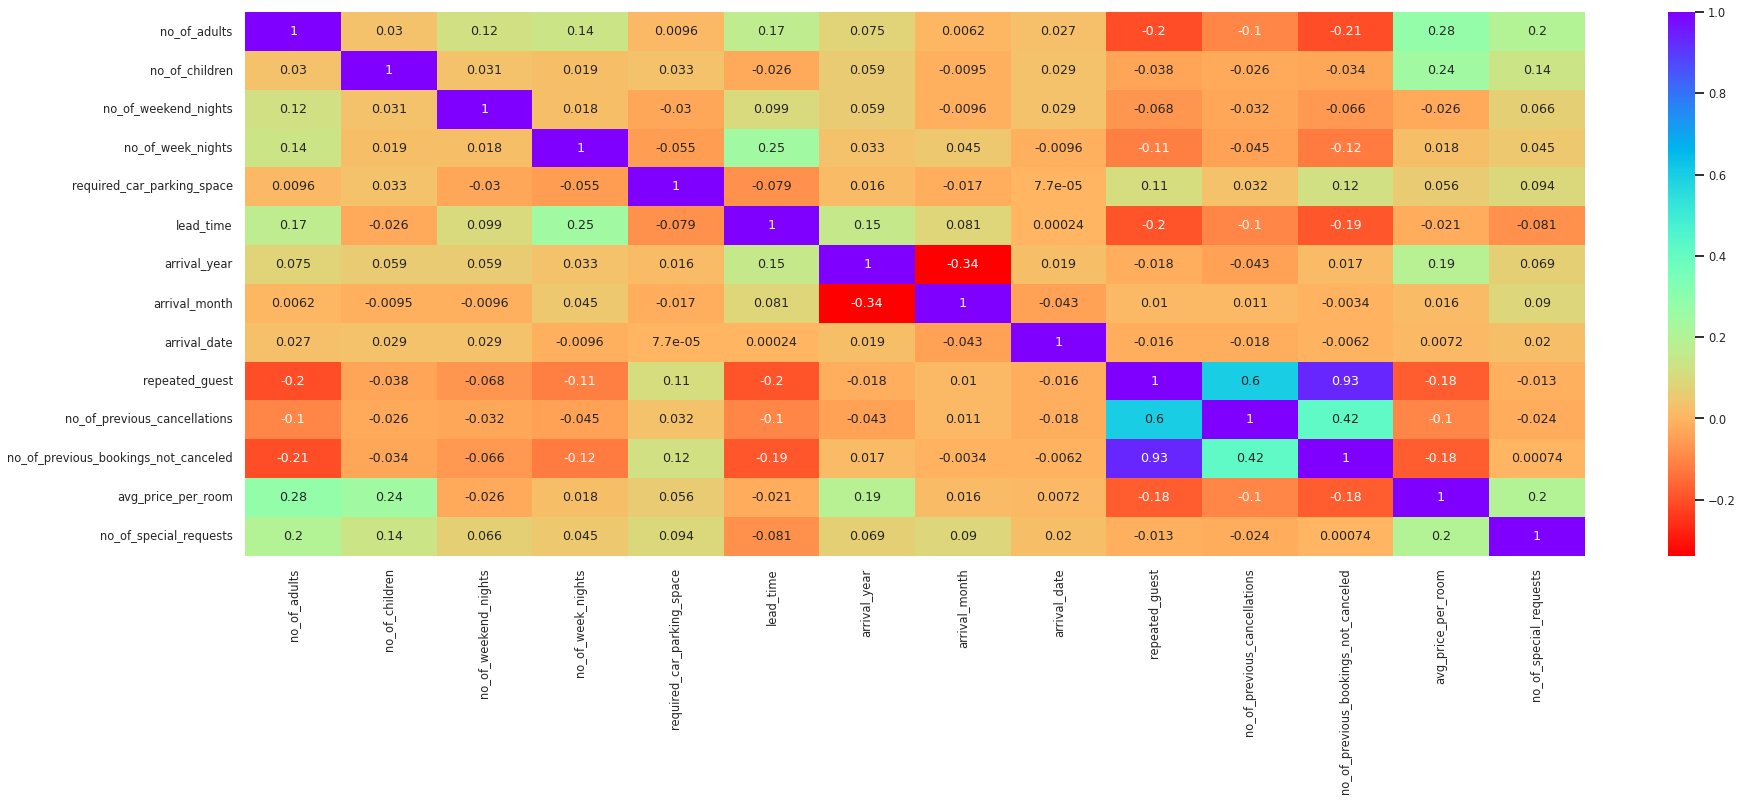

In [27]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

[Text(0.5, 1.0, 'Variable `lead_time`')]

[Text(0.5, 1.0, 'Variable `arrival_date`')]

[Text(0.5, 1.0, 'Variable `arrival_month`')]

[Text(0.5, 1.0, 'Variable `avg_price_per_room`')]

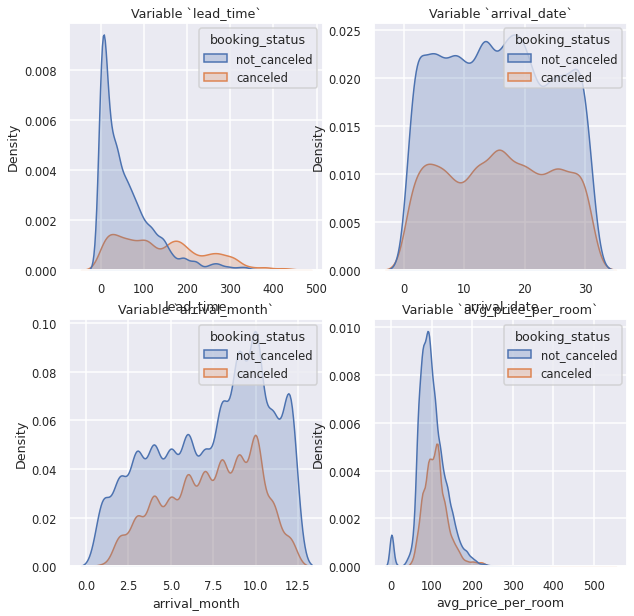

In [28]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
#plt.figure(figsize=(6, 4))

#sns.histplot(df.target, bins=40, color='black', alpha=1)
#plt.ylabel('sex')
#plt.xlabel('target')
#plt.show()

col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for column in ["lead_time", "arrival_date", "arrival_month", "avg_price_per_room"]:
    sns.kdeplot(
        data=df, x=column, ax=ax[row, col], hue="booking_status", shade=True
    ).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0


In [29]:
# Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

In [30]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(29020, 7255)

(29020, 7255)

In [31]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.booking_status).values
y_test = (df_test.booking_status).values
del df_train_full['booking_status']
del df_test['booking_status']

In [32]:
len(y_train),len(y_test)


(29020, 7255)

In [33]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [34]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [35]:
X_test.shape

(7255, 29050)

LogisticRegression(solver='liblinear')

LR: 0.798966 (0.007969)
Score for each of the 10 K-fold tests:  [0.7911785  0.78911096 0.78842178 0.80323915 0.79634735 0.80702963
 0.7946244  0.81357684 0.80082702 0.80530669]
LogisticRegression(solver='liblinear')
	Training time: 6.797s
	Prediction time: 71.466s



KNeighborsClassifier()

KNN: 0.807650 (0.005463)
Score for each of the 10 K-fold tests:  [0.81185389 0.80117161 0.81082012 0.81288766 0.79531358 0.80702963
 0.80737422 0.81426602 0.80634045 0.80944176]
KNeighborsClassifier()
	Training time: 0.354s
	Prediction time: 1666.501s



DecisionTreeClassifier()

CART: 0.880186 (0.005531)
Score for each of the 10 K-fold tests:  [0.87284631 0.87388008 0.88077188 0.88421778 0.87250172 0.8904204
 0.87939352 0.88077188 0.88146106 0.88559614]
DecisionTreeClassifier()
	Training time: 54.336s
	Prediction time: 448.753s



Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f605c00a9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f605bcfb3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f605c00ac40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f605bcfb8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f605bcfbe80>,
 'means': []}

[Text(1, 0, 'LR'), Text(2, 0, 'KNN'), Text(3, 0, 'CART')]

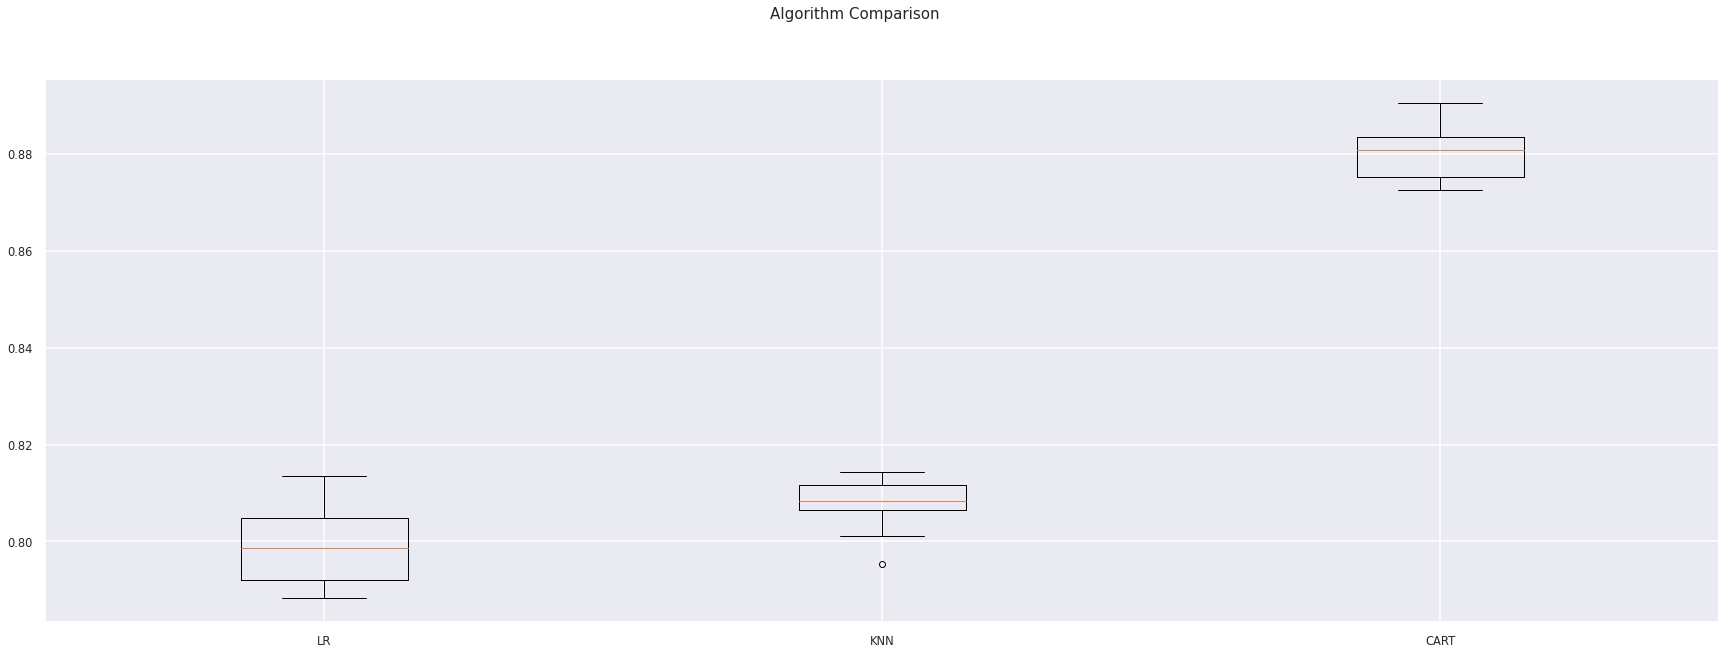

In [36]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [37]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [ ]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

In [39]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

numpy.ndarray

list

numpy.ndarray

['arrival_date',
 'arrival_month',
 'arrival_year',
 'avg_price_per_room',
 'booking_id=inn00001',
 'booking_id=inn00002',
 'booking_id=inn00003',
 'booking_id=inn00004',
 'booking_id=inn00005',
 'booking_id=inn00006',
 'booking_id=inn00007',
 'booking_id=inn00008',
 'booking_id=inn00009',
 'booking_id=inn00010',
 'booking_id=inn00011',
 'booking_id=inn00012',
 'booking_id=inn00014',
 'booking_id=inn00015',
 'booking_id=inn00016',
 'booking_id=inn00017',
 'booking_id=inn00018',
 'booking_id=inn00019',
 'booking_id=inn00020',
 'booking_id=inn00021',
 'booking_id=inn00022',
 'booking_id=inn00023',
 'booking_id=inn00024',
 'booking_id=inn00025',
 'booking_id=inn00029',
 'booking_id=inn00030',
 'booking_id=inn00032',
 'booking_id=inn00033',
 'booking_id=inn00034',
 'booking_id=inn00036',
 'booking_id=inn00037',
 'booking_id=inn00039',
 'booking_id=inn00040',
 'booking_id=inn00041',
 'booking_id=inn00042',
 'booking_id=inn00043',
 'booking_id=inn00046',
 'booking_id=inn00047',
 'booking_id=

In [40]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [41]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

Streaming output truncated to the last 5000 lines.
0.000 booking_id=inn30027
0.000 booking_id=inn30028
0.000 booking_id=inn30029
0.000 booking_id=inn30030
0.000 booking_id=inn30031
0.000 booking_id=inn30032
0.000 booking_id=inn30033
0.000 booking_id=inn30034
0.000 booking_id=inn30035
0.000 booking_id=inn30036
0.000 booking_id=inn30037
0.000 booking_id=inn30038
0.000 booking_id=inn30039
0.000 booking_id=inn30040
0.000 booking_id=inn30041
0.000 booking_id=inn30042
0.000 booking_id=inn30045
0.000 booking_id=inn30046
0.000 booking_id=inn30047
0.000 booking_id=inn30048
0.000 booking_id=inn30049
0.000 booking_id=inn30050
0.000 booking_id=inn30051
0.000 booking_id=inn30052
0.000 booking_id=inn30054
0.000 booking_id=inn30055
0.000 booking_id=inn30056
0.000 booking_id=inn30058
0.000 booking_id=inn30060
0.000 booking_id=inn30061
0.000 booking_id=inn30062
0.000 booking_id=inn30063
0.000 booking_id=inn30064
0.000 booking_id=inn30065
0.000 booking_id=inn30066
0.000 booking_id=inn30068
0.000 booking

Text(0, 0, '1523')

Text(1, 0, '886')

Text(0, 1, '435')

Text(1, 1, '4411')

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

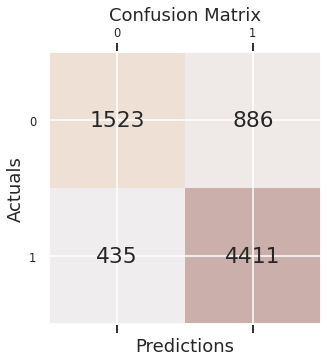

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    canceled       0.78      0.63      0.70      2409
not_canceled       0.83      0.91      0.87      4846

    accuracy                           0.82      7255
   macro avg       0.81      0.77      0.78      7255
weighted avg       0.81      0.82      0.81      7255



In [71]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [ ]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

In [46]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'booking_id': 'inn25419',
 'no_of_adults': 2,
 'no_of_children': 0,
 'no_of_weekend_nights': 0,
 'no_of_week_nights': 1,
 'type_of_meal_plan': 'not_selected',
 'required_car_parking_space': 0,
 'room_type_reserved': 'room_type_1',
 'lead_time': 51,
 'arrival_year': 2018,
 'arrival_month': 7,
 'arrival_date': 6,
 'market_segment_type': 'online',
 'repeated_guest': 0,
 'no_of_previous_cancellations': 0,
 'no_of_previous_bookings_not_canceled': 0,
 'avg_price_per_room': 107.1,
 'no_of_special_requests': 0}

In [47]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'booking_id': 'inn34124',
 'no_of_adults': 2,
 'no_of_children': 0,
 'no_of_weekend_nights': 0,
 'no_of_week_nights': 2,
 'type_of_meal_plan': 'not_selected',
 'required_car_parking_space': 0,
 'room_type_reserved': 'room_type_1',
 'lead_time': 12,
 'arrival_year': 2018,
 'arrival_month': 1,
 'arrival_date': 22,
 'market_segment_type': 'online',
 'repeated_guest': 0,
 'no_of_previous_cancellations': 0,
 'no_of_previous_bookings_not_canceled': 0,
 'avg_price_per_room': 75.0,
 'no_of_special_requests': 0}

In [72]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [73]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [74]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [75]:
model_prediction(item,dv,dt)

'canceled'

In [76]:
actual

array(['canceled'], dtype=object)

In [83]:
model_prediction_proba(item,dv,dt)

0.3701403266620658

In [84]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'booking_id': 'inn36186',
 'no_of_adults': 2,
 'no_of_children': 0,
 'no_of_weekend_nights': 1,
 'no_of_week_nights': 4,
 'type_of_meal_plan': 'meal_plan_1',
 'required_car_parking_space': 0,
 'room_type_reserved': 'room_type_1',
 'lead_time': 141,
 'arrival_year': 2018,
 'arrival_month': 7,
 'arrival_date': 13,
 'market_segment_type': 'offline',
 'repeated_guest': 0,
 'no_of_previous_cancellations': 0,
 'no_of_previous_bookings_not_canceled': 0,
 'avg_price_per_room': 72.25,
 'no_of_special_requests': 2}

In [89]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
## Program crashed thrice , to re-run with different data set